In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from matplotlib.pyplot import figure

In [2]:
# Data has been read from different batches of data
# Data files for random dst and origin pincode
df=pd.read_csv("DataGen/dtdcData/0_1000_master_dtdc.csv",dtype='unicode',names=["org_pin", "dst_pin", "dst_state", "po_del", "dtdc_del", "box","len","wid","dep","vol_wt","act_wt","obj_cost","shipper","service","period","price","add_price","price_risk_sur","price_carr_risk_sur","price_own_risk_sur","price_with_ins","gstPer","basePrice","gst","gst_risk_sur","gst_carr_risk_sur","gst_own_risk_sur","edd","charge_wt"])
df1=pd.read_csv("DataGen/dtdcData/0_1000_master_dtdc.csv",dtype='unicode',names=["org_pin", "dst_pin", "dst_state", "po_del", "dtdc_del", "box","len","wid","dep","vol_wt","act_wt","obj_cost","shipper","service","period","price","add_price","price_risk_sur","price_carr_risk_sur","price_own_risk_sur","price_with_ins","gstPer","basePrice","gst","gst_risk_sur","gst_carr_risk_sur","gst_own_risk_sur","edd","charge_wt"])
df2=pd.read_csv("DataGen/dtdcData/1001_3000_master_dtdc.csv",dtype='unicode',names=["org_pin", "dst_pin", "dst_state", "po_del", "dtdc_del", "box","len","wid","dep","vol_wt","act_wt","obj_cost","shipper","service","period","price","add_price","price_risk_sur","price_carr_risk_sur","price_own_risk_sur","price_with_ins","gstPer","basePrice","gst","gst_risk_sur","gst_carr_risk_sur","gst_own_risk_sur","edd","charge_wt"])
df3=pd.read_csv("DataGen/dtdcData2/3001_13000_master_dtdc.csv",dtype='unicode',names=["org_pin", "dst_pin", "dst_state", "po_del", "dtdc_del", "box","len","wid","dep","vol_wt","act_wt","obj_cost","shipper","service","period","price","add_price","price_risk_sur","price_carr_risk_sur","price_own_risk_sur","price_with_ins","gstPer","basePrice","gst","gst_risk_sur","gst_carr_risk_sur","gst_own_risk_sur","edd","charge_wt"])

# Data files for interstate pincodes
df4=pd.read_csv("DataGen/dtdcData3/0_200_master_dtdc.csv",dtype='unicode',names=["org_pin", "dst_pin", "dst_state", "po_del", "dtdc_del", "box","len","wid","dep","vol_wt","act_wt","obj_cost","shipper","service","period","price","add_price","price_risk_sur","price_carr_risk_sur","price_own_risk_sur","price_with_ins","gstPer","basePrice","gst","gst_risk_sur","gst_carr_risk_sur","gst_own_risk_sur","edd","charge_wt"])
df5=pd.read_csv("DataGen/dtdcData3/201_400_master_dtdc.csv",dtype='unicode',names=["org_pin", "dst_pin", "dst_state", "po_del", "dtdc_del", "box","len","wid","dep","vol_wt","act_wt","obj_cost","shipper","service","period","price","add_price","price_risk_sur","price_carr_risk_sur","price_own_risk_sur","price_with_ins","gstPer","basePrice","gst","gst_risk_sur","gst_carr_risk_sur","gst_own_risk_sur","edd","charge_wt"])
df6=pd.read_csv("DataGen/dtdcData3/401_600_master_dtdc.csv",dtype='unicode',names=["org_pin", "dst_pin", "dst_state", "po_del", "dtdc_del", "box","len","wid","dep","vol_wt","act_wt","obj_cost","shipper","service","period","price","add_price","price_risk_sur","price_carr_risk_sur","price_own_risk_sur","price_with_ins","gstPer","basePrice","gst","gst_risk_sur","gst_carr_risk_sur","gst_own_risk_sur","edd","charge_wt"])

df7=pd.read_csv("DataGen/dtdcData4/15000_15150_master_dtdc.csv",dtype='unicode',names=["org_pin", "dst_pin", "dst_state", "po_del", "dtdc_del", "box","len","wid","dep","vol_wt","act_wt","obj_cost","shipper","service","period","price","add_price","price_risk_sur","price_carr_risk_sur","price_own_risk_sur","price_with_ins","gstPer","basePrice","gst","gst_risk_sur","gst_carr_risk_sur","gst_own_risk_sur","edd","charge_wt"])


In [3]:
# Get all Pincode data for domestic model
pincode_data=pd.read_csv("DataGen/india_pincode_geo_metro.csv")

In [4]:
# Dropping duplicate rows
df1=df1.drop_duplicates()
df2=df2.drop_duplicates()
df3=df3.drop_duplicates()
df4=df4.drop_duplicates()
df5=df5.drop_duplicates()
df6=df6.drop_duplicates()
df7=df7.drop_duplicates()


In [5]:
cdf=pd.concat([df1,df2,df3,df4,df5,df6,df7]).reset_index(drop=True)

In [6]:
# Drop irrelevant columns

cdf = cdf.drop(columns=['dtdc_del', 'box','shipper','add_price','price_risk_sur', 'price_carr_risk_sur',
       'price_own_risk_sur', 'price_with_ins','gst_risk_sur', 'gst_carr_risk_sur', 'gst_own_risk_sur', 'edd','dst_state']);

In [7]:
# cdf has around 60k records for a supplier
cdf

,org_pin,dst_pin,po_del,len,wid,dep,vol_wt,act_wt,obj_cost,service,period,price,gstPer,basePrice,gst,charge_wt
0,600032,686503,True,22.86,15.24,7.62,0.53,1273,20581,PREMIUM,4 Day/s,565,18,565,86,1273
1,600032,686503,True,22.86,15.24,7.62,0.53,1273,20581,STD EXP-A,4 - 5 Day/s,240,18,240,37,1273
2,600032,686503,True,22.86,15.24,7.62,0.53,1273,20581,AIR CARGO,4 - 5 Day/s,360,18,360,55,1273
3,600032,686503,True,22.86,15.24,7.62,0.53,1273,20581,GROUND EXPRESS,4 - 5 Day/s,240,18,240,37,1273
4,171001,394325,True,17.7,10.1,10.1,0.361,118,14986,PREMIUM,5 Day/s,380,18,380,58,362
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63137,614702,521101,False,68.58,33.02,35.56,16.105,30,7428,PREMIUM,2 Day/s,3485,18,3485,532,16106
63138,614702,521101,False,68.58,33.02,35.56,16.105,30,7428,STD EXP-A,3 - 4 Day/s,1930,18,1930,294,16106
63139,614702,521101,False,68.58,33.02,35.56,16.105,30,7428,AIR CARGO,3 - 4 Day/s,2040,18,2040,311,16106
63140,614702,521101,False,68.58,33.02,35.56,16.105,30,7428,GROUND EXPRESS,3 - 4 Day/s,1360,18,1360,207,16953


In [8]:
# For the time being we will only use one service for the cheapest option having min cost, we will add create another model to predict EDD
# Futher model can be developed by categorising different services as additional parameter

min_pr_grp=cdf.groupby(['org_pin', 'dst_pin'])['price']

In [9]:
cdf=cdf.assign(min_price=min_pr_grp.transform(min))

In [10]:
cdf['min_price']

0         240
1         240
2         240
3         240
4         190
         ... 
63137    1360
63138    1360
63139    1360
63140    1360
63141    3485
Name: min_price, Length: 63142, dtype: object

In [11]:
cdf['is_min_price'] = cdf.apply(lambda x: 1 if x['price'] == x['min_price'] else 0, axis=1)

In [12]:
cdf=cdf.drop(cdf[cdf.is_min_price == 0].index)

In [13]:
cdf.service.unique()

array(['STD EXP-A', 'GROUND EXPRESS', 'PREMIUM', 'AIR CARGO',
       'PRIME TIME PLUS 1400', 'PRIME TIME PLUS 1600',
       'PRIME TIME PLUS 1200'], dtype=object)

In [14]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16526 entries, 1 to 63141
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   org_pin       16526 non-null  object
 1   dst_pin       16526 non-null  object
 2   po_del        16526 non-null  object
 3   len           16526 non-null  object
 4   wid           16526 non-null  object
 5   dep           16526 non-null  object
 6   vol_wt        16526 non-null  object
 7   act_wt        16526 non-null  object
 8   obj_cost      16526 non-null  object
 9   service       16526 non-null  object
 10  period        16526 non-null  object
 11  price         16526 non-null  object
 12  gstPer        16526 non-null  object
 13  basePrice     16526 non-null  object
 14  gst           16526 non-null  object
 15  charge_wt     16526 non-null  object
 16  min_price     16526 non-null  object
 17  is_min_price  16526 non-null  int64 
dtypes: int64(1), object(17)
memory usage: 2.4+ MB


In [15]:
cdf['org_pin'] = cdf['org_pin'].astype(int)
cdf['dst_pin'] = cdf['dst_pin'].astype(int)
cdf['po_del'] = cdf['po_del'].apply(lambda x: 1 if x == 'True' else 0)
cdf['vol_wt'] = cdf['vol_wt'].astype(float)
cdf['vol_wt'] = cdf['vol_wt'].apply(lambda x: x*1000)
cdf['price'] = cdf['price'].astype(int)
cdf['len']=cdf['len'].astype(float)
cdf['wid']=cdf['wid'].astype(float)
cdf['dep']=cdf['dep'].astype(float)
cdf['vol_wt'] = cdf['vol_wt'].round(0).astype(int)
cdf['act_wt'] = cdf['act_wt'].astype(int)
cdf['obj_cost'] = cdf['obj_cost'].astype(int)
cdf['price'] = cdf['price'].astype(int)
cdf['gstPer'] = cdf['gstPer'].astype(int)
cdf['basePrice'] = cdf['basePrice'].astype(int)
cdf['gst'] = cdf['gst'].astype(int)
cdf['charge_wt'] = cdf['charge_wt'].astype(int)
cdf['min_price'] = cdf['min_price'].astype(int)

In [16]:
cdf=cdf.drop_duplicates(["org_pin","dst_pin","act_wt","vol_wt","obj_cost"])

In [17]:
cdf = cdf.reset_index(drop=True)

In [18]:
cdf

,org_pin,dst_pin,po_del,len,wid,dep,vol_wt,act_wt,obj_cost,service,period,price,gstPer,basePrice,gst,charge_wt,min_price,is_min_price
0,600032,686503,1,22.86,15.24,7.62,530,1273,20581,STD EXP-A,4 - 5 Day/s,240,18,240,37,1273,240,1
1,171001,394325,1,17.70,10.10,10.10,361,118,14986,STD EXP-A,5 - 6 Day/s,190,18,190,29,362,190,1
2,131039,521104,1,34.00,33.00,6.00,1347,942,10185,STD EXP-A,4 - 5 Day/s,460,18,460,70,1347,460,1
3,175131,614713,0,22.00,11.50,7.50,380,59,19870,STD EXP-A,5 - 6 Day/s,190,18,190,29,380,190,1
4,403509,757025,1,30.00,30.00,10.00,1800,505,6363,PREMIUM,4 Day/s,1115,18,1115,170,1800,1115,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16336,521101,614702,0,68.58,33.02,35.56,16105,28,18060,PREMIUM,3 Day/s,3485,18,3485,532,16106,3485,1
16337,614702,521101,0,68.58,33.02,35.56,16105,29,8142,GROUND EXPRESS,3 - 4 Day/s,1360,18,1360,207,16953,1360,1
16338,521101,614702,0,68.58,33.02,35.56,16105,29,8142,PREMIUM,3 Day/s,3485,18,3485,532,16106,3485,1
16339,614702,521101,0,68.58,33.02,35.56,16105,30,7428,GROUND EXPRESS,3 - 4 Day/s,1360,18,1360,207,16953,1360,1


In [19]:
eddDays=cdf['period'].apply(lambda x: x[0])

In [20]:
cdf['period'].unique()

array(['4 - 5 Day/s', '5 - 6 Day/s', '4 Day/s', '3 - 4 Day/s', '3 Day/s',
       '6 - 7 Day/s', '2 - 3 Day/s', '9 Day/s', '5 Day/s', '7 Day/s',
       '8 Day/s', '4 - 5 days', '10 - 11 Day/s', '7 - 8 Day/s',
       '14 - 15 Day/s', '1 - 2 Day/s', '6 Day/s', '1 Day/s', '2 Day/s',
       '8 - 9 Day/s', '10 Day/s', '9 - 10 Day/s', '12 - 13 Day/s',
       '11 - 12 Day/s', '14 Day/s', '5 - 6 days', '3 - 4 days',
       'Next Business Day by 2 PM', '7 - 8 days', '1 day', '3 days',
       '10 - 11 days', '6 - 7 days', '4 days', '13 - 14 Day/s',
       '8 - 9 days', '11 Day/s', '1 - 2 days', '6 days', '5 days',
       '9 - 10 days', '12 - 13 days', '12 Day/s', '7 days', '17 Day/s',
       '13 Day/s', 'Next Business Day by 4 PM', '2 - 3 days', '18 Day/s',
       '2 days', '16 - 17 Day/s', '15 - 16 Day/s', '11 - 12 days',
       'Next Business Day by 12 PM'], dtype=object)

In [21]:
cdf['eddDays'] = 0

In [22]:
cdf['eddDays'][cdf.loc[(cdf['period'] == 'Next Business Day by 12 PM') | (cdf['period'] == 'Next Business Day by 4 PM') | (cdf['period'] == 'Next Business Day by 2 PM')].index] = 1


/var/folders/bn/w9w3gf013z3cdsvwbs4y84900000gn/T/ipykernel_46157/3098010839.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['eddDays'][cdf.loc[(cdf['period'] == 'Next Business Day by 12 PM') | (cdf['period'] == 'Next Business Day by 4 PM') | (cdf['period'] == 'Next Business Day by 2 PM')].index] = 1


In [23]:
# Manually fetch edd value due to inconsistant pattern
cdf['eddDays'][cdf.loc[(cdf['period'] == '2 days')].index] = 2
cdf['eddDays'][cdf.loc[(cdf['period'] == '4 - 5 Day/s')].index] = 5
cdf['eddDays'][cdf.loc[(cdf['period'] == '5 - 6 Day/s')].index] = 6
cdf['eddDays'][cdf.loc[(cdf['period'] == '4 Day/s')].index] = 4
cdf['eddDays'][cdf.loc[(cdf['period'] == '3 - 4 Day/s')].index] = 4
cdf['eddDays'][cdf.loc[(cdf['period'] == '3 Day/s')].index] = 3
cdf['eddDays'][cdf.loc[(cdf['period'] == '2 - 3 Day/s')].index] = 3
cdf['eddDays'][cdf.loc[(cdf['period'] == '9 Day/s')].index] = 9
cdf['eddDays'][cdf.loc[(cdf['period'] == '5 Day/s')].index] = 5
cdf['eddDays'][cdf.loc[(cdf['period'] == '7 Day/s')].index] = 7
cdf['eddDays'][cdf.loc[(cdf['period'] == '8 Day/s')].index] = 8
cdf['eddDays'][cdf.loc[(cdf['period'] == '10 - 11 Day/s')].index] = 11
cdf['eddDays'][cdf.loc[(cdf['period'] == '7 - 8 Day/s')].index] = 8
cdf['eddDays'][cdf.loc[(cdf['period'] == '14 - 15 Day/s')].index] = 15
cdf['eddDays'][cdf.loc[(cdf['period'] == '1 - 2 Day/s')].index] = 2
cdf['eddDays'][cdf.loc[(cdf['period'] == '6 Day/s')].index] = 6
cdf['eddDays'][cdf.loc[(cdf['period'] == '1 Day/s')].index] = 1
cdf['eddDays'][cdf.loc[(cdf['period'] == '2 Day/s')].index] = 2
cdf['eddDays'][cdf.loc[(cdf['period'] == '8 - 9 Day/s')].index] = 9
cdf['eddDays'][cdf.loc[(cdf['period'] == '10 Day/s')].index] = 10
cdf['eddDays'][cdf.loc[(cdf['period'] == '9 - 10 Day/s')].index] = 10
cdf['eddDays'][cdf.loc[(cdf['period'] == '12 - 13 Day/s')].index] = 13
cdf['eddDays'][cdf.loc[(cdf['period'] == '11 - 12 Day/s')].index] = 12
cdf['eddDays'][cdf.loc[(cdf['period'] == '14 Day/s')].index] = 14
cdf['eddDays'][cdf.loc[(cdf['period'] == '5 - 6 days')].index] = 6
cdf['eddDays'][cdf.loc[(cdf['period'] == '3 - 4 days')].index] = 4
cdf['eddDays'][cdf.loc[(cdf['period'] == '7 - 8 days')].index] = 8
cdf['eddDays'][cdf.loc[(cdf['period'] == '1 day')].index] = 1
cdf['eddDays'][cdf.loc[(cdf['period'] == '3 days')].index] = 3
cdf['eddDays'][cdf.loc[(cdf['period'] == '10 - 11 days')].index] = 11
cdf['eddDays'][cdf.loc[(cdf['period'] == '13 - 14 Day/s')].index] = 14
cdf['eddDays'][cdf.loc[(cdf['period'] == '8 - 9 days')].index] = 9
cdf['eddDays'][cdf.loc[(cdf['period'] == '4 days')].index] = 4
cdf['eddDays'][cdf.loc[(cdf['period'] == '11 Day/s')].index] = 11
cdf['eddDays'][cdf.loc[(cdf['period'] == '1 - 2 days')].index] = 2
cdf['eddDays'][cdf.loc[(cdf['period'] == '6 days')].index] = 6
cdf['eddDays'][cdf.loc[(cdf['period'] == '5 days')].index] = 5
cdf['eddDays'][cdf.loc[(cdf['period'] == '9 - 10 days')].index] = 10
cdf['eddDays'][cdf.loc[(cdf['period'] == '12 - 13 days')].index] = 13
cdf['eddDays'][cdf.loc[(cdf['period'] == '12 Day/s')].index] = 12
cdf['eddDays'][cdf.loc[(cdf['period'] == '7 days')].index] = 7
cdf['eddDays'][cdf.loc[(cdf['period'] == '17 Day/s')].index] = 17
cdf['eddDays'][cdf.loc[(cdf['period'] == '13 Day/s')].index] = 13
cdf['eddDays'][cdf.loc[(cdf['period'] == '2 - 3 days')].index] = 3
cdf['eddDays'][cdf.loc[(cdf['period'] == '18 Day/s')].index] = 18
cdf['eddDays'][cdf.loc[(cdf['period'] == '16 - 17 Day/s')].index] = 17
cdf['eddDays'][cdf.loc[(cdf['period'] == '15 - 16 Day/s')].index] = 16
cdf['eddDays'][cdf.loc[(cdf['period'] == '11 - 12 days')].index] = 12
cdf['eddDays'][cdf.loc[(cdf['period'] == '6 - 7 Day/s')].index] = 7
cdf['eddDays'][cdf.loc[(cdf['period'] == '4 - 5 days')].index] = 5
cdf['eddDays'][cdf.loc[(cdf['period'] == '6 - 7 days')].index] = 7

/var/folders/bn/w9w3gf013z3cdsvwbs4y84900000gn/T/ipykernel_46157/3502655848.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['eddDays'][cdf.loc[(cdf['period'] == '2 days')].index] = 2
/var/folders/bn/w9w3gf013z3cdsvwbs4y84900000gn/T/ipykernel_46157/3502655848.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cdf['eddDays'][cdf.loc[(cdf['period'] == '4 - 5 Day/s')].index] = 5
/var/folders/bn/w9w3gf013z3cdsvwbs4y84900000gn/T/ipykernel_46157/3502655848.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

In [24]:
cdf['eddDays'].unique()

array([ 5,  6,  4,  3,  7,  9,  8, 11, 15,  2,  1, 10, 13, 12, 14, 17, 18,
       16])

In [25]:
cdf=cdf.drop(columns=['is_min_price'])

In [26]:
pincode_data = pincode_data.drop(columns=['Dtdc_del','id'])

In [27]:
pincode_data

,Pincode,Po_del,State,LatitudeNum,LongitudeNum,hasMetroCity,isSpecialDest
0,515631,True,ANDHRAPRADESH,14.561000,77.854260,0,0
1,515581,True,ANDHRAPRADESH,14.248000,78.254890,0,0
2,515571,True,ANDHRAPRADESH,13.922672,78.201171,0,0
3,515311,True,ANDHRAPRADESH,13.805106,77.043906,0,0
4,515281,True,ANDHRAPRADESH,14.128104,76.980103,0,0
...,...,...,...,...,...,...,...
19295,744209,True,ANDAMANANDNICOBARISLANDS,12.380685,92.802739,0,1
19296,744101,False,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1
19297,744203,True,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1
19298,744106,True,ANDAMANANDNICOBARISLANDS,11.665833,92.741111,0,1


In [28]:
pincode_data1 = pincode_data.copy()
pincode_data2 = pincode_data.copy()

In [29]:
# We will join pincode data for both origin and dest to the consolidated df 
pincode_data1['org_pin']=pincode_data1['Pincode']
pincode_data1['org_state']=pincode_data1['State']
pincode_data1['org_lat']=pincode_data1['LatitudeNum']
pincode_data1['org_long']=pincode_data1['LongitudeNum']
pincode_data1['org_hasMetroCity']=pincode_data1['hasMetroCity']
pincode_data1['org_isSpecialDest']=pincode_data1['isSpecialDest']
pincode_data1['org_po_del']=pincode_data1['Po_del']

In [30]:
pincode_data2['dst_pin']=pincode_data2['Pincode']
pincode_data2['dst_state']=pincode_data2['State']
pincode_data2['dst_lat']=pincode_data2['LatitudeNum']
pincode_data2['dst_long']=pincode_data2['LongitudeNum']
pincode_data2['dst_hasMetroCity']=pincode_data2['hasMetroCity']
pincode_data2['dst_isSpecialDest']=pincode_data2['isSpecialDest']
pincode_data2['dst_po_del']=pincode_data2['Po_del']

In [31]:
pincode_data1=pincode_data1.drop(columns=['Pincode', 'State', 'LatitudeNum', 'LongitudeNum', 'hasMetroCity', 'isSpecialDest', 'Po_del'])
pincode_data2=pincode_data2.drop(columns=['Pincode', 'State', 'LatitudeNum', 'LongitudeNum', 'hasMetroCity', 'isSpecialDest', 'Po_del'])

In [32]:
cdf = pd.merge(cdf, pincode_data1, on='org_pin')

In [33]:
cdf = pd.merge(cdf, pincode_data2, on='dst_pin')

In [34]:
cdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16331 entries, 0 to 16330
Data columns (total 30 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_pin            16331 non-null  int64  
 1   dst_pin            16331 non-null  int64  
 2   po_del             16331 non-null  int64  
 3   len                16331 non-null  float64
 4   wid                16331 non-null  float64
 5   dep                16331 non-null  float64
 6   vol_wt             16331 non-null  int64  
 7   act_wt             16331 non-null  int64  
 8   obj_cost           16331 non-null  int64  
 9   service            16331 non-null  object 
 10  period             16331 non-null  object 
 11  price              16331 non-null  int64  
 12  gstPer             16331 non-null  int64  
 13  basePrice          16331 non-null  int64  
 14  gst                16331 non-null  int64  
 15  charge_wt          16331 non-null  int64  
 16  min_price          163

In [35]:
# cdf.to_csv('minPriceModelDataTestUpdated1Sep.csv')

In [36]:
cdf=cdf.drop(columns=['period','service','gst','gstPer','basePrice','po_del'])

In [37]:
cdf=cdf.drop(columns=['min_price'])

In [38]:
df = cdf.copy()

In [39]:
df

,org_pin,dst_pin,len,wid,dep,vol_wt,act_wt,obj_cost,price,charge_wt,...,org_long,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_state,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del
0,600032,686503,22.86,15.24,7.62,530,1273,20581,240,1273,...,80.208667,1,0,False,KERALA,9.605166,76.671168,0,0,True
1,362225,686503,22.00,11.50,7.50,380,428,18639,190,428,...,70.140988,0,0,True,KERALA,9.605166,76.671168,0,0,True
2,600032,620002,17.70,10.10,10.10,361,187,19663,100,362,...,80.208667,1,0,False,TAMILNADU,10.826333,78.695920,1,0,False
3,110037,620002,34.00,33.00,35.00,7854,4697,12818,1125,8268,...,77.115528,1,0,False,TAMILNADU,10.826333,78.695920,1,0,False
4,110037,620002,34.00,33.00,35.00,7854,4370,5715,1125,8268,...,77.115528,1,0,False,TAMILNADU,10.826333,78.695920,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16326,798601,324004,21.00,10.10,15.50,657,26,10686,325,658,...,94.518833,0,1,True,RAJASTHAN,25.132500,75.894167,0,0,True
16327,798601,324004,21.00,10.10,15.50,657,27,21939,325,658,...,94.518833,0,1,True,RAJASTHAN,25.132500,75.894167,0,0,True
16328,798601,324004,21.00,10.10,15.50,657,28,11166,325,658,...,94.518833,0,1,True,RAJASTHAN,25.132500,75.894167,0,0,True
16329,798601,324004,21.00,10.10,15.50,657,29,12283,325,658,...,94.518833,0,1,True,RAJASTHAN,25.132500,75.894167,0,0,True


In [40]:
import pickle
stateLableEncoder = []
with open('stateLE.pkl','rb') as f:
     stateLableEncoder = pickle.load(f)

In [41]:
df.select_dtypes(include="object").columns

Index(['org_state', 'dst_state'], dtype='object')

In [42]:
cat_col=[]
le=stateLableEncoder
for i in df.select_dtypes(include="object").columns:
    cat_col.append(i)
    df[i]=le.transform(df[i])
    
cat_col

['org_state', 'dst_state']

In [43]:
pd.set_option('display.max_columns', None)

In [44]:
df

,org_pin,dst_pin,len,wid,dep,vol_wt,act_wt,obj_cost,price,charge_wt,eddDays,org_state,org_lat,org_long,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_state,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del
0,600032,686503,22.86,15.24,7.62,530,1273,20581,240,1273,5,29,13.035944,80.208667,1,0,False,15,9.605166,76.671168,0,0,True
1,362225,686503,22.00,11.50,7.50,380,428,18639,190,428,7,9,21.148343,70.140988,0,0,True,15,9.605166,76.671168,0,0,True
2,600032,620002,17.70,10.10,10.10,361,187,19663,100,362,3,29,13.035944,80.208667,1,0,False,29,10.826333,78.695920,1,0,False
3,110037,620002,34.00,33.00,35.00,7854,4697,12818,1125,8268,6,7,28.540000,77.115528,1,0,False,29,10.826333,78.695920,1,0,False
4,110037,620002,34.00,33.00,35.00,7854,4370,5715,1125,8268,6,7,28.540000,77.115528,1,0,False,29,10.826333,78.695920,1,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16326,798601,324004,21.00,10.10,15.50,657,26,10686,325,658,6,23,26.324694,94.518833,0,1,True,27,25.132500,75.894167,0,0,True
16327,798601,324004,21.00,10.10,15.50,657,27,21939,325,658,6,23,26.324694,94.518833,0,1,True,27,25.132500,75.894167,0,0,True
16328,798601,324004,21.00,10.10,15.50,657,28,11166,325,658,6,23,26.324694,94.518833,0,1,True,27,25.132500,75.894167,0,0,True
16329,798601,324004,21.00,10.10,15.50,657,29,12283,325,658,6,23,26.324694,94.518833,0,1,True,27,25.132500,75.894167,0,0,True


In [45]:
df["chr_wt"] = df[["act_wt", "vol_wt"]].max(axis=1)

In [46]:
df=df.drop(['charge_wt'],axis=1)

In [47]:
df

,org_pin,dst_pin,len,wid,dep,vol_wt,act_wt,obj_cost,price,eddDays,org_state,org_lat,org_long,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_state,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del,chr_wt
0,600032,686503,22.86,15.24,7.62,530,1273,20581,240,5,29,13.035944,80.208667,1,0,False,15,9.605166,76.671168,0,0,True,1273
1,362225,686503,22.00,11.50,7.50,380,428,18639,190,7,9,21.148343,70.140988,0,0,True,15,9.605166,76.671168,0,0,True,428
2,600032,620002,17.70,10.10,10.10,361,187,19663,100,3,29,13.035944,80.208667,1,0,False,29,10.826333,78.695920,1,0,False,361
3,110037,620002,34.00,33.00,35.00,7854,4697,12818,1125,6,7,28.540000,77.115528,1,0,False,29,10.826333,78.695920,1,0,False,7854
4,110037,620002,34.00,33.00,35.00,7854,4370,5715,1125,6,7,28.540000,77.115528,1,0,False,29,10.826333,78.695920,1,0,False,7854
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16326,798601,324004,21.00,10.10,15.50,657,26,10686,325,6,23,26.324694,94.518833,0,1,True,27,25.132500,75.894167,0,0,True,657
16327,798601,324004,21.00,10.10,15.50,657,27,21939,325,6,23,26.324694,94.518833,0,1,True,27,25.132500,75.894167,0,0,True,657
16328,798601,324004,21.00,10.10,15.50,657,28,11166,325,6,23,26.324694,94.518833,0,1,True,27,25.132500,75.894167,0,0,True,657
16329,798601,324004,21.00,10.10,15.50,657,29,12283,325,6,23,26.324694,94.518833,0,1,True,27,25.132500,75.894167,0,0,True,657


In [48]:
# Function to calculate haversine distance between two lat long coordinates, it is accurate to ~1m in terms of point on earth
def haversine_np(lon1, lat1, lon2, lat2):
    """
    Calculate the great circle distance between two points
    on the earth (specified in decimal degrees)
    
    All args must be of equal length.    
    
    """
    lon1, lat1, lon2, lat2 = map(np.radians, [lon1, lat1, lon2, lat2])
    
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    
    a = np.sin(dlat/2.0)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlon/2.0)**2
    
    c = 2 * np.arcsin(np.sqrt(a))
    km = 6378.137 * c
    return km

In [49]:
df['distance'] = haversine_np(df['org_long'],df['org_lat'],df['dst_long'],df['dst_lat'])

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16331 entries, 0 to 16330
Data columns (total 24 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_pin            16331 non-null  int64  
 1   dst_pin            16331 non-null  int64  
 2   len                16331 non-null  float64
 3   wid                16331 non-null  float64
 4   dep                16331 non-null  float64
 5   vol_wt             16331 non-null  int64  
 6   act_wt             16331 non-null  int64  
 7   obj_cost           16331 non-null  int64  
 8   price              16331 non-null  int64  
 9   eddDays            16331 non-null  int64  
 10  org_state          16331 non-null  int64  
 11  org_lat            16331 non-null  float64
 12  org_long           16331 non-null  float64
 13  org_hasMetroCity   16331 non-null  int64  
 14  org_isSpecialDest  16331 non-null  int64  
 15  org_po_del         16331 non-null  bool   
 16  dst_state          163

In [51]:
df['dst_po_del'] = df['dst_po_del'].apply(lambda x: 1 if x == True else 0)
df['org_po_del'] = df['org_po_del'].apply(lambda x: 1 if x == True else 0)


In [52]:
corr_matrix = df.drop(columns=['price','eddDays'],axis=1).corr()

<Axes: >

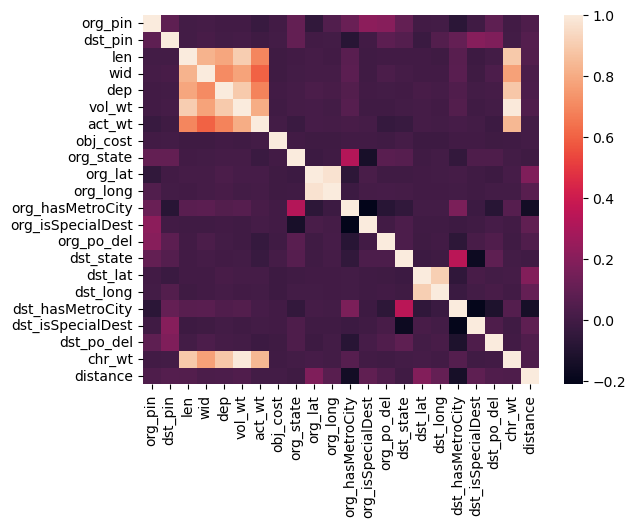

In [53]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
%matplotlib inline
sns.heatmap(corr_matrix)

In [54]:
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper 

/var/folders/bn/w9w3gf013z3cdsvwbs4y84900000gn/T/ipykernel_46157/73047246.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,org_pin,dst_pin,len,wid,dep,vol_wt,act_wt,obj_cost,org_state,org_lat,org_long,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_state,dst_lat,dst_long,dst_hasMetroCity,dst_isSpecialDest,dst_po_del,chr_wt,distance
org_pin,NaN,0.086305,0.002323,0.008244,-0.002106,0.001260,-0.027572,-0.001841,0.099198,-0.053662,0.045338,0.117560,0.218398,0.202598,0.100411,0.000508,0.001914,-0.069635,-0.005019,0.082900,-0.001086,0.034752
dst_pin,NaN,NaN,0.005854,0.015989,0.003651,0.006240,-0.011973,0.002398,0.099158,-0.002530,0.004367,-0.083606,-0.002736,0.081361,0.055382,-0.025134,0.052507,0.104158,0.197687,0.180921,0.004919,0.057467
len,NaN,NaN,NaN,0.824846,0.784544,0.902888,0.694745,-0.009744,0.001083,0.009204,0.000431,0.069520,-0.007760,-0.001500,-0.000615,-0.001065,-0.008596,0.065885,-0.014472,0.003882,0.888929,0.053127
wid,NaN,NaN,NaN,NaN,0.708731,0.776402,0.598932,-0.012130,0.004953,0.010082,0.008754,0.075279,-0.004626,0.027506,0.006317,-0.000025,-0.001015,0.071666,-0.009140,0.033920,0.770097,0.025482
dep,NaN,NaN,NaN,NaN,NaN,0.892416,0.686319,-0.002962,0.006995,0.027964,0.019283,0.050398,-0.000364,0.001841,-0.000085,0.016197,0.010116,0.043946,0.002578,0.008080,0.886348,0.034378
vol_wt,NaN,NaN,NaN,NaN,NaN,NaN,0.804402,-0.004890,0.008563,0.014092,0.004363,0.059554,-0.003565,-0.003384,0.004879,0.006663,-0.001082,0.053425,-0.005356,0.001807,0.993549,0.041647
act_wt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002936,-0.026011,0.015132,0.006565,0.019433,0.007052,-0.039941,-0.029658,0.009198,0.004493,0.015580,0.001959,-0.019789,0.839097,0.006015
obj_cost,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.000541,-0.009968,-0.009473,-0.000153,-0.001308,-0.007398,0.007243,-0.013477,-0.014196,0.000973,-0.000634,-0.010172,-0.003842,0.002962
org_state,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018152,-0.004768,0.323387,-0.132317,0.068468,0.060332,-0.003486,0.004114,-0.047554,0.034916,0.035400,0.005910,-0.009471
org_lat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.969451,-0.065430,0.024147,-0.006233,-0.004152,0.000293,0.001815,0.006399,-0.007173,-0.012978,0.013426,0.181235


In [55]:
df.drop(['vol_wt','act_wt','org_lat','org_long','dst_lat','dst_long','len','wid','dep'],inplace=True,axis=1)

In [56]:
corr_matrix = df.drop(columns=['price','eddDays'],axis=1).corr()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
upper

/var/folders/bn/w9w3gf013z3cdsvwbs4y84900000gn/T/ipykernel_46157/3578782581.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))


,org_pin,dst_pin,obj_cost,org_state,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_state,dst_hasMetroCity,dst_isSpecialDest,dst_po_del,chr_wt,distance
org_pin,NaN,0.086305,-0.001841,0.099198,0.117560,0.218398,0.202598,0.100411,-0.069635,-0.005019,0.082900,-0.001086,0.034752
dst_pin,NaN,NaN,0.002398,0.099158,-0.083606,-0.002736,0.081361,0.055382,0.104158,0.197687,0.180921,0.004919,0.057467
obj_cost,NaN,NaN,NaN,-0.000541,-0.000153,-0.001308,-0.007398,0.007243,0.000973,-0.000634,-0.010172,-0.003842,0.002962
org_state,NaN,NaN,NaN,NaN,0.323387,-0.132317,0.068468,0.060332,-0.047554,0.034916,0.035400,0.005910,-0.009471
org_hasMetroCity,NaN,NaN,NaN,NaN,NaN,-0.211453,-0.081138,-0.052134,0.171092,-0.018890,-0.081232,0.060799,-0.153495
org_isSpecialDest,NaN,NaN,NaN,NaN,NaN,NaN,-0.003174,0.034083,-0.015046,-0.003547,0.015601,-0.002965,0.087619
org_po_del,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.034412,-0.066824,0.015778,0.041082,-0.005996,0.040132
dst_state,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.346706,-0.172889,0.085059,0.002168,-0.003656
dst_hasMetroCity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.200133,-0.114881,0.054668,-0.136101
dst_isSpecialDest,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.035070,-0.004819,0.082326


<Axes: >

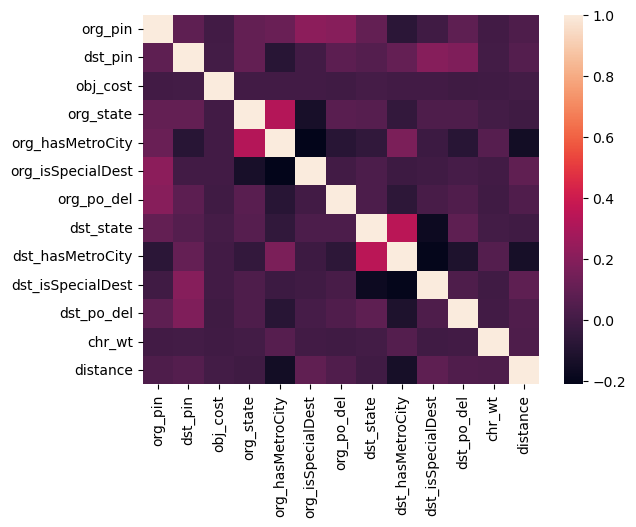

In [57]:
sns.heatmap(corr_matrix)

In [58]:
x = df.drop(columns=['price','eddDays'],axis=1)
y = df['price']

In [59]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=12)

In [60]:
from sklearn.preprocessing import MinMaxScaler

norm = MinMaxScaler().fit(x_train)
x_test_norm = norm.transform(x_test)

In [61]:
# import pickle
# with open('norm.pkl','wb') as f:
#     pickle.dump(norm,f)

In [62]:
x_train.columns

Index(['org_pin', 'dst_pin', 'obj_cost', 'org_state', 'org_hasMetroCity',
       'org_isSpecialDest', 'org_po_del', 'dst_state', 'dst_hasMetroCity',
       'dst_isSpecialDest', 'dst_po_del', 'chr_wt', 'distance'],
      dtype='object')

In [63]:
x_train_norm = norm.transform(x_train)


In [64]:
x_test

,org_pin,dst_pin,obj_cost,org_state,org_hasMetroCity,org_isSpecialDest,org_po_del,dst_state,dst_hasMetroCity,dst_isSpecialDest,dst_po_del,chr_wt,distance
10936,560050,679121,21659,14,1,0,0,15,0,0,0,1908,321.568608
13786,477117,515301,7369,18,0,0,1,1,0,0,0,329,1395.846097
11458,695551,680732,1183,15,0,0,1,15,0,0,1,3900,195.702350
2589,342001,627413,9645,27,0,0,0,29,1,0,1,5805,2009.683279
11591,570002,629164,12184,14,1,0,0,29,1,0,1,7854,454.965283
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4018,636106,533342,7484,29,1,0,1,1,0,0,1,739,709.148761
4286,627353,231221,15878,29,1,0,1,34,0,0,1,2170,1806.356299
14823,410222,444605,4346,19,1,0,1,19,1,0,1,694,528.184216
9179,629203,743223,13557,29,1,0,1,35,1,0,1,361,2031.328744


In [65]:
x_train_norm

array([[8.20830862e-01, 4.88506333e-01, 4.69300988e-01, ...,
        1.00000000e+00, 1.08404113e-02, 8.74227618e-02],
       [6.76950662e-01, 7.05000362e-01, 8.08844984e-01, ...,
        1.00000000e+00, 1.08404113e-02, 1.32648999e-02],
       [7.73944915e-01, 2.95568684e-02, 1.25713809e-01, ...,
        1.00000000e+00, 7.82297720e-02, 1.77007608e-01],
       ...,
       [5.12694838e-01, 7.13570955e-01, 6.77754158e-02, ...,
        0.00000000e+00, 6.95760691e-01, 9.98052960e-02],
       [7.51570917e-05, 2.68418185e-05, 8.23933975e-01, ...,
        0.00000000e+00, 4.75711518e-02, 2.50382368e-04],
       [3.67735597e-01, 8.73856874e-01, 5.17402359e-01, ...,
        1.00000000e+00, 6.22075697e-01, 1.09414228e-01]])

In [66]:
from sklearn.preprocessing import StandardScaler

X_train_stand = x_train.copy()
X_test_stand = x_test.copy()

# numerical features
num_cols = ['chr_wt']

# apply standardization on numerical features
for i in num_cols:
    
    # fit on training data column
    scale = StandardScaler().fit(X_train_stand[[i]])
    
    # transform the training data column
    X_train_stand[i] = scale.transform(X_train_stand[[i]])
    
    # transform the testing data column
    X_test_stand[i] = scale.transform(X_test_stand[[i]])

In [67]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13064 entries, 1249 to 14155
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   org_pin            13064 non-null  int64  
 1   dst_pin            13064 non-null  int64  
 2   obj_cost           13064 non-null  int64  
 3   org_state          13064 non-null  int64  
 4   org_hasMetroCity   13064 non-null  int64  
 5   org_isSpecialDest  13064 non-null  int64  
 6   org_po_del         13064 non-null  int64  
 7   dst_state          13064 non-null  int64  
 8   dst_hasMetroCity   13064 non-null  int64  
 9   dst_isSpecialDest  13064 non-null  int64  
 10  dst_po_del         13064 non-null  int64  
 11  chr_wt             13064 non-null  int64  
 12  distance           13064 non-null  float64
dtypes: float64(1), int64(12)
memory usage: 1.4 MB


In [68]:
def test_accuracy(models):
    for i in models:
        i.fit(x_train,np.log(y_train))
        pred=pd.Series(i.predict(x_test)).abs()
        print("{}:{}".format(i,mean_squared_log_error(y_test, np.exp(pred))))

In [69]:
from sklearn.metrics import mean_squared_log_error
from sklearn.ensemble import RandomForestRegressor, ExtraTreesRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor

In [70]:
ran=RandomForestRegressor(n_jobs=-1)
grad=GradientBoostingRegressor()
xgb=XGBRegressor()
lgb=LGBMRegressor()
cat=CatBoostRegressor(verbose=200)
ada=AdaBoostRegressor()
lr=LinearRegression()
rd=Ridge()
ls=Lasso()
knn=KNeighborsRegressor()

In [71]:
models=[xgb, ran, lgb, grad, cat,ada,lr,rd,ls,knn]
test_accuracy(models)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...):0.053228106956084306
RandomForestRegressor(n_jobs=-1):0.054599165306903806
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000495 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info

In [72]:
ypred_lgb = pd.Series(lgb.predict(x_test)).abs()
mean_squared_log_error(y_test,np.exp(ypred_lgb))

0.055312025722578484

In [73]:
ypred_lgb

0       5.453903
1       5.247239
2       5.570860
3       7.300464
4       7.435118
          ...   
3262    5.366151
3263    7.237380
3264    5.208703
3265    5.330936
3266    7.043391
Length: 3267, dtype: float64

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.003262 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1351
[LightGBM] [Info] Number of data points in the train set: 3267, number of used features: 13
[LightGBM] [Info] Start training from score 6.288672


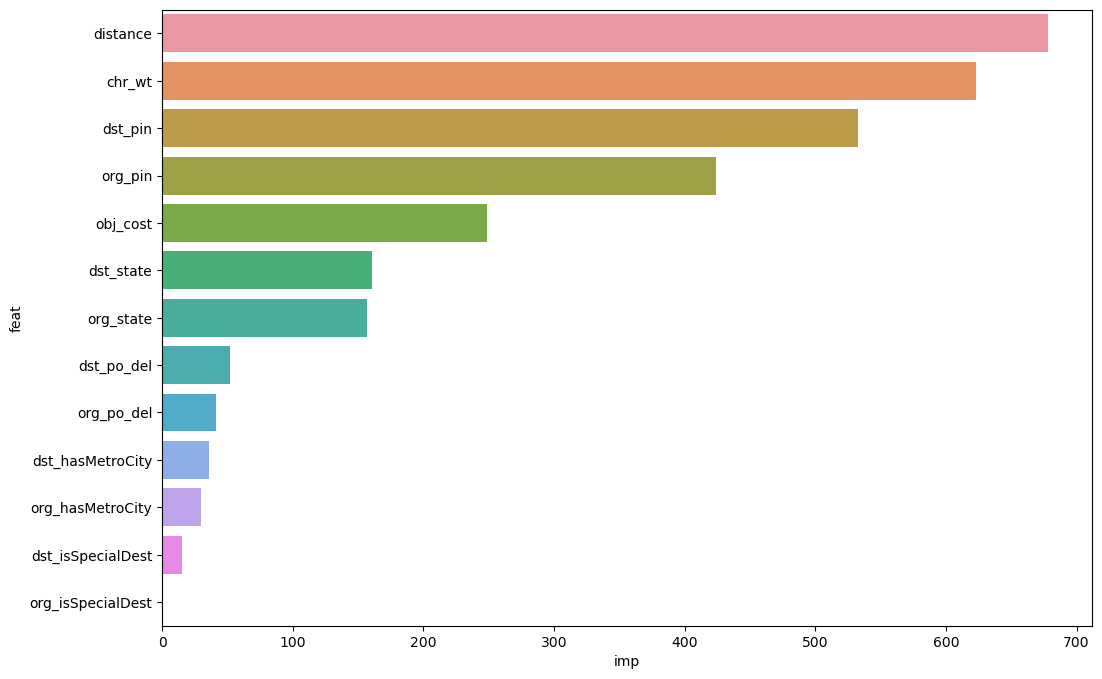

In [74]:
plt.figure(figsize=(12,8))
lgb.fit(x_test,np.log(y_test))
a=zip(x.columns,lgb.feature_importances_)
feat_imp=pd.DataFrame(a)
feat_imp.columns=["feat","imp"]
feat_imp=feat_imp.sort_values(by="imp", ascending=False)
sns.barplot(data=feat_imp, x="imp", y="feat");

In [75]:
yt=y_test.reset_index(drop=True)

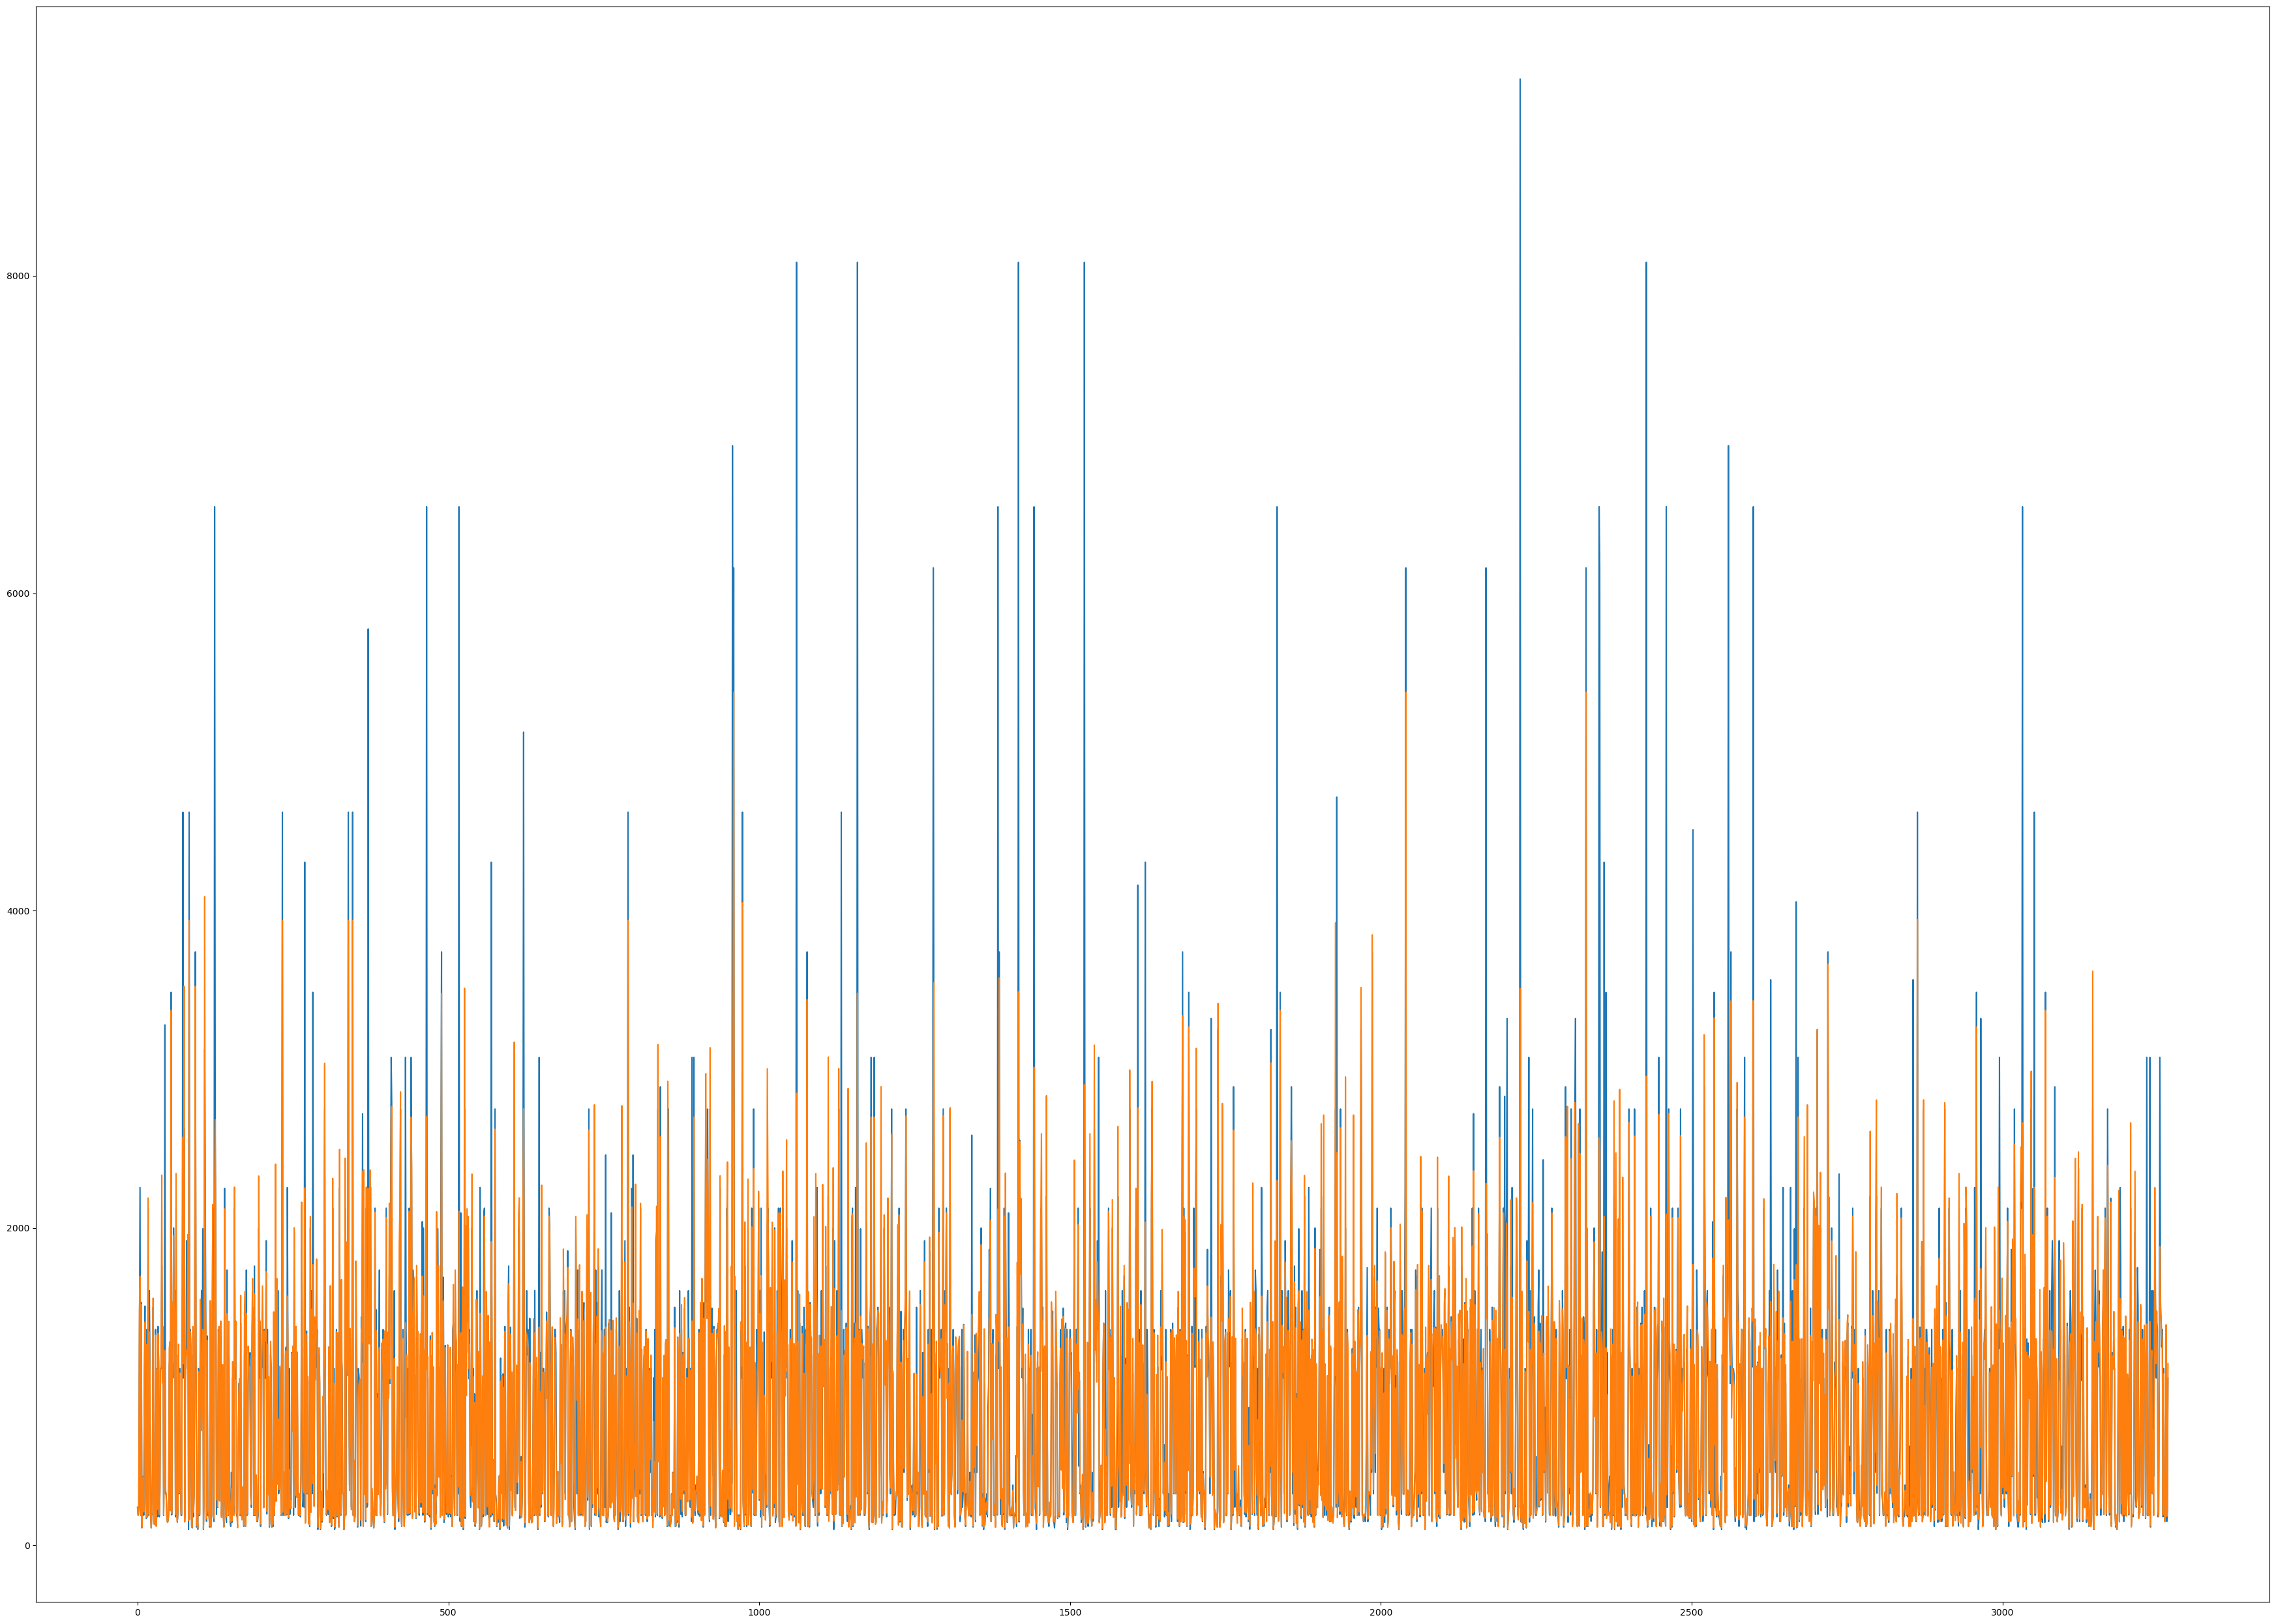

In [76]:
from matplotlib.pyplot import figure
figure(figsize=(35, 25), dpi=100)
plt.plot(yt)
plt.tight_layout()
plt.plot(np.exp(ypred_lgb))

In [77]:
import pickle
with open('min_price_pred_cat_2.pkl','wb') as f:
    pickle.dump(cat,f)

In [78]:
# Saving grad as this is the only model which can run on cloud fast without heavy import and is comparable

import pickle
with open('min_price_pred_grad_final.pkl','wb') as f:
    pickle.dump(grad,f)

In [79]:
x_train.columns

Index(['org_pin', 'dst_pin', 'obj_cost', 'org_state', 'org_hasMetroCity',
       'org_isSpecialDest', 'org_po_del', 'dst_state', 'dst_hasMetroCity',
       'dst_isSpecialDest', 'dst_po_del', 'chr_wt', 'distance'],
      dtype='object')